# Data Description
---
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

---

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

---

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

# What is diabetes ? 
Acccording to NIH, "**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

**What are the different types of diabetes?**
The most common types of diabetes are type 1, type 2, and gestational diabetes.

**Type 1 diabetes**
If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

**Type 2 diabetes**
If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

**Gestational diabetes**
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

**Other types of diabetes**
Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

# Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format",lambda x: "%.5f" % x)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
df = pd.read_csv("diabetes.csv")
data = df.copy()
d=df.head(10)
table = ff.create_table(d)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 9
iplot(table)

In [5]:
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
0            6      148             72             35        0 33.60000   
1            1       85             66             29        0 26.60000   
2            8      183             64              0        0 23.30000   
3            1       89             66             23       94 28.10000   
4            0      137             40             35      168 43.10000   

   DiabetesPedigreeFunction  Age  Outcome  
0                   0.62700   50        1  
1                   0.35100   31        0  
2                   0.67200   32        1  
3                   0.16700   21        0  
4                   2.28800   33        1

In [6]:
import plotly.graph_objs as go
import plotly.offline as py

D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [7]:
target_count()
target_percent()

In [8]:
# Let's distinguish between dependent and independent variables.
y = df[["Outcome"]]
X = df.drop(["Outcome"], axis=1)

In [9]:
tree = DecisionTreeClassifier(random_state=42).fit(X,y)
y_pred = tree.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



### Does our model look very successful ?

 ### SOLUTION BOX
 
 ### Of course not, our model memorized the structure instead of learning it. There is no way we can predict 1 in real life, of course we will make mistakes.


<center><img
src="https://miro.medium.com/max/1400/1*YqWguKepue2PlBX0LBqzbg.gif" style="width:50%;height:50%;">
</center>


* Let's rebuild with model testing. 
---
Single training-test distinction -- with cross validation.
Cross validation separates training and testing multiple times and gives us a better idea of how the model will perform on unseen data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# train
model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_train)
y_prob = model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       199

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [12]:
# test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       123
           1       0.58      0.71      0.64        69

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.73      0.71      0.71       192



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


* **Need for model validation. F1 score ~65%**

## Visualize the Decision Tree

In [ ]:
#pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


Decision tree visualization saved as 'cart2.png'


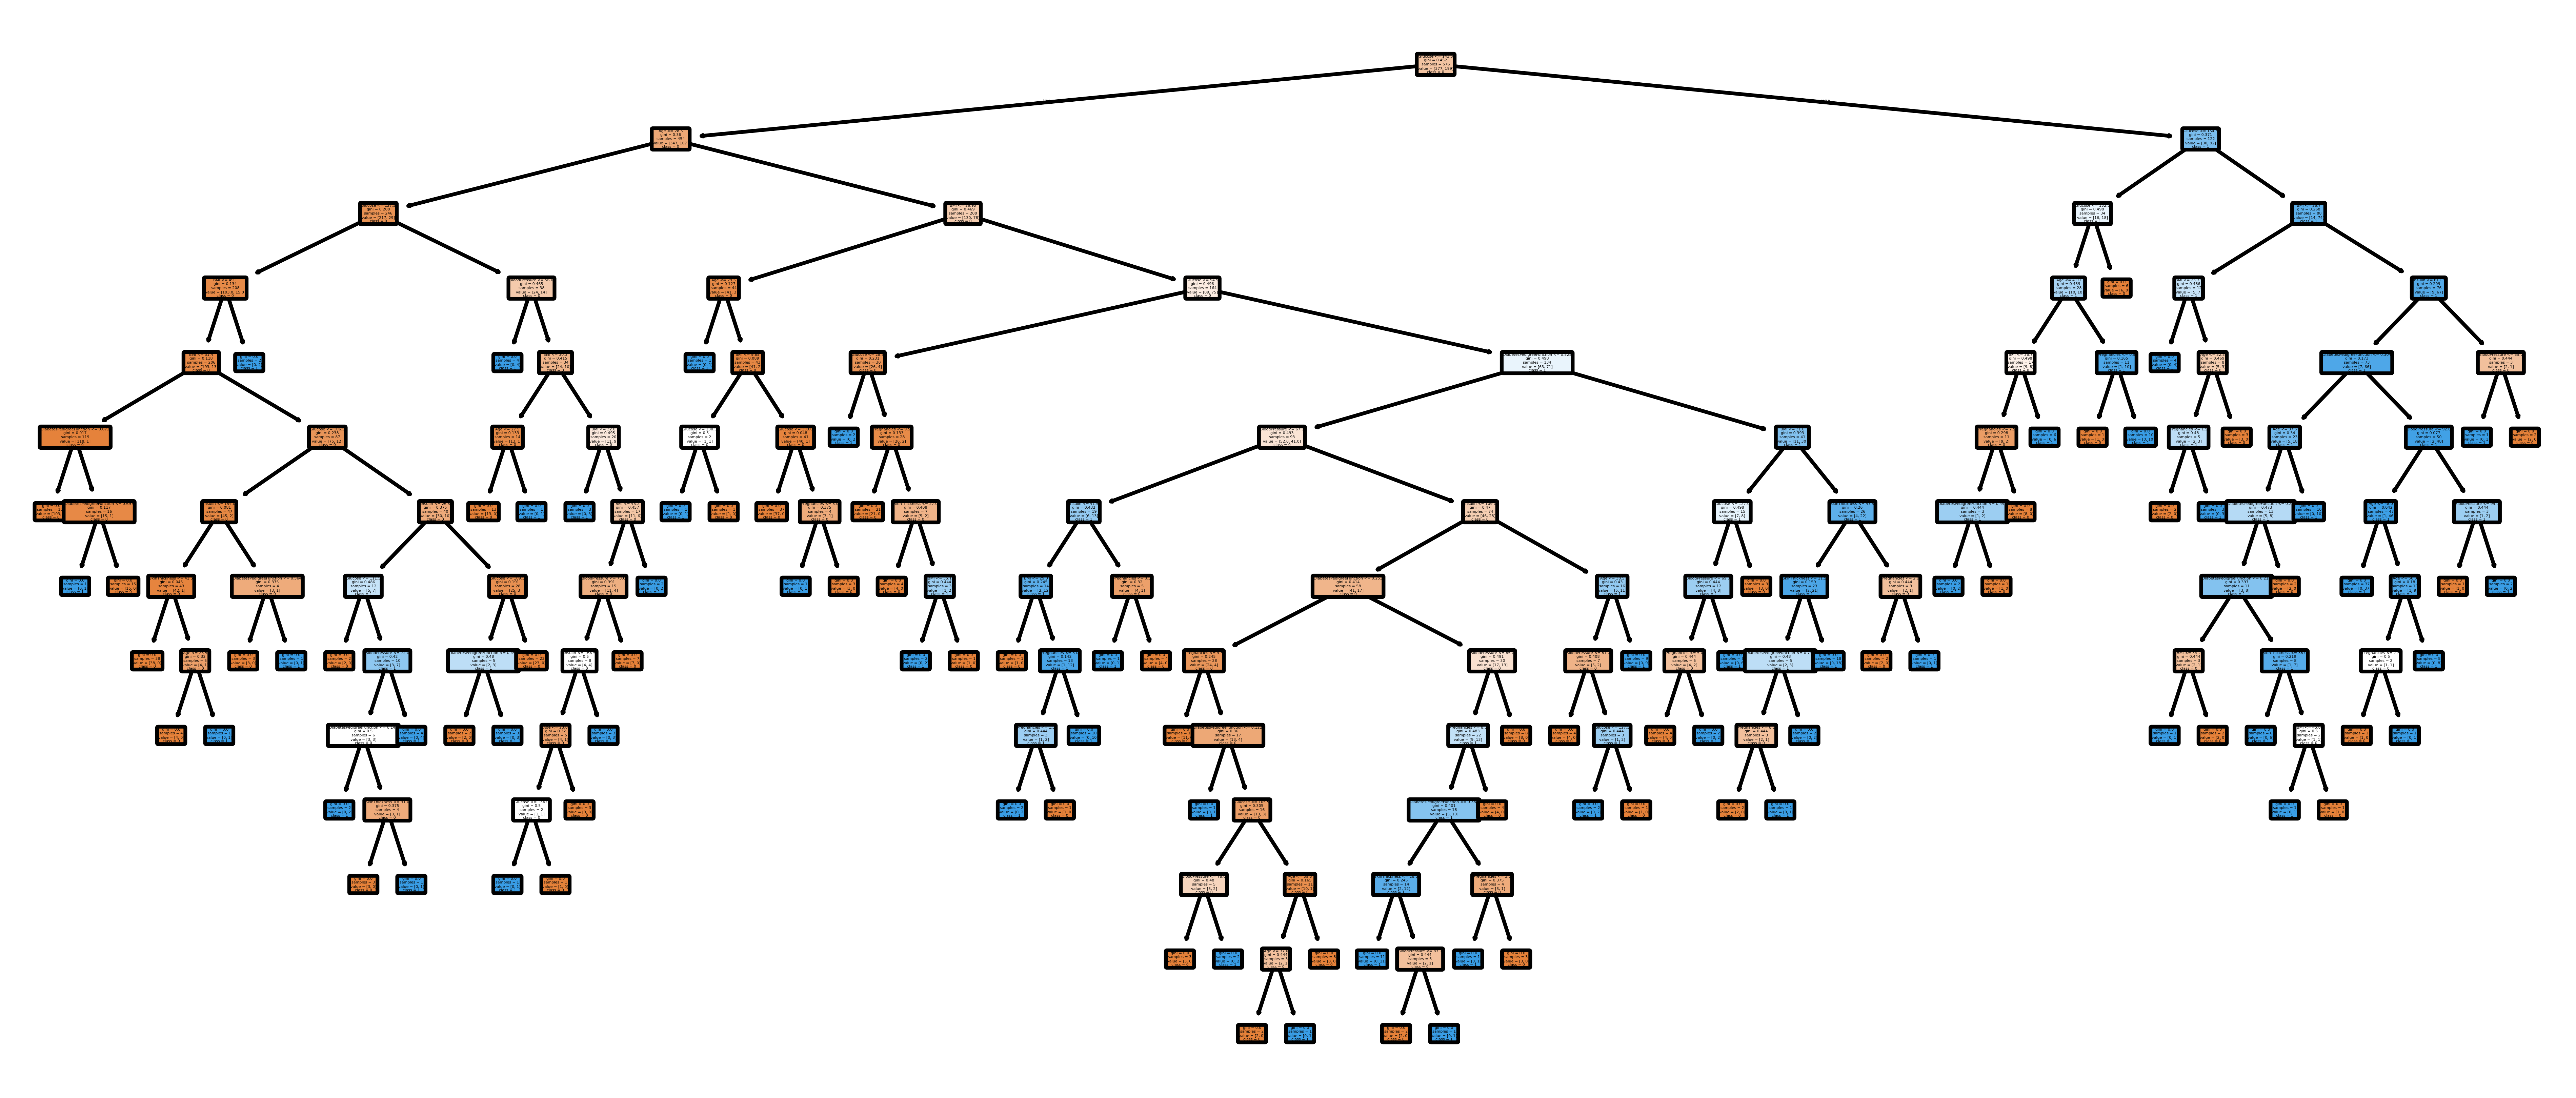

In [35]:
from sklearn.tree import export_graphviz, plot_tree
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

def tree_graph_to_png(tree_model, feature_names, output_file='cart2.png', figsize=(12, 5), dpi=800):
    plt.figure(figsize=figsize, dpi=dpi)
    
    # Plot the tree
    plot_tree(
        tree_model,
        feature_names=feature_names,
        class_names=["0", "1"],
        filled=True,
        rounded=True
    )
    
    # Save the figure
    plt.savefig("./output/"+output_file)
    print(f"Decision tree visualization saved as '{output_file}'")
    
    # Return the current figure for display in the notebook
    return plt.gcf()

fig = tree_graph_to_png(model, X_train.columns)
#display(fig)

## Alternative way of plotting the decition tree

In [14]:
from sklearn.tree import export_graphviz
import pydotplus

In [15]:
def tree_graph_to_png(tree, feature_names):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    

In [16]:
tree_str = export_graphviz(model, feature_names=X_train.columns, filled=True, out_file=None)
graph = pydotplus.graphviz.graph_from_dot_data(tree_str)
graph.write_png("cart2.png")

True

In [17]:
from IPython.display import Image

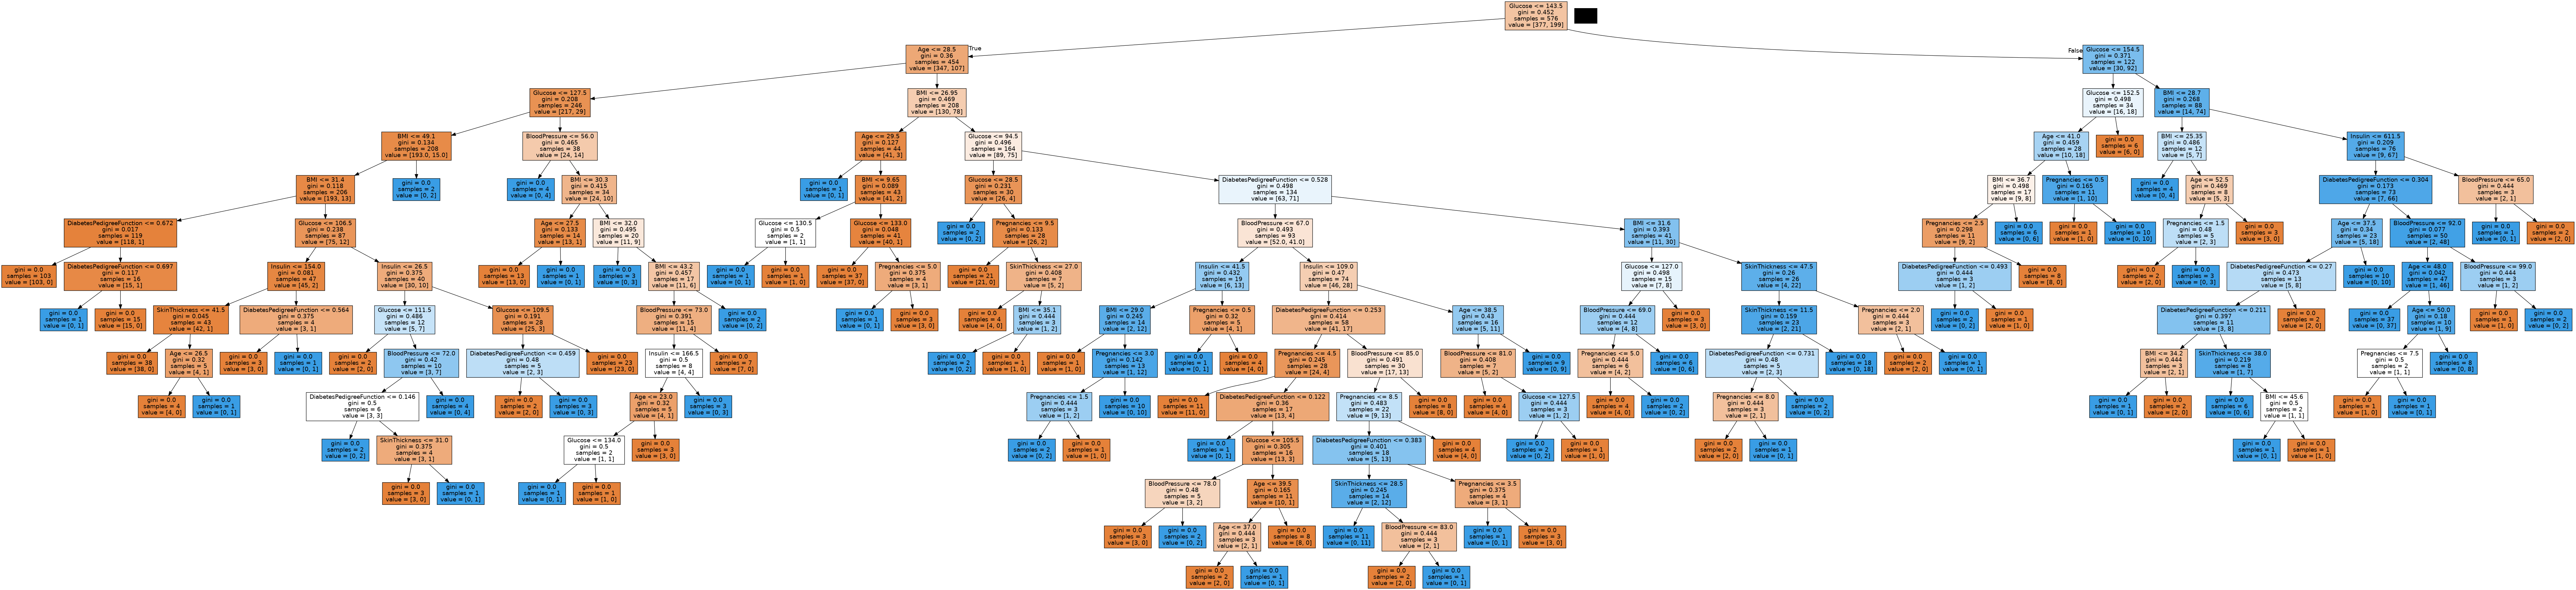

In [18]:
Image(graph.create_png())

### Make Decision Rules

In [19]:
from sklearn.tree import export_text

In [20]:
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

|--- Glucose <= 143.50
|   |--- Age <= 28.50
|   |   |--- Glucose <= 127.50
|   |   |   |--- BMI <= 49.10
|   |   |   |   |--- BMI <= 31.40
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  31.40
|   |   |   |   |   |--- Glucose <= 106.50
|   |   |   |   |   |   |--- Insulin <= 154.00
|   |   |   |   |   |   |   |--- SkinThickness <= 41.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SkinThickness >  41.50
|   |   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   

### Extracting Python Code of Decision Rules

In [ ]:
#pip install skompiler

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install astor

Note: you may need to restart the kernel to use updated packages.


In [22]:
from skompiler import skompile
import astor

In [23]:
print(skompile(model.predict).to('python/code'))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 41.5 else 0 if x[7] <=
    26.5 else 1) if x[4] <= 154.0 else 0 if x[6] <= 0.5635000169277191 else
    1) if x[1] <= 106.5 else (0 if x[1] <= 111.5 else (1 if x[6] <= 
    0.1459999978542328 else 0 if x[3] <= 31.0 else 1) if x[2] <= 72.0 else 
    1) if x[4] <= 26.5 else (0 if x[6] <= 0.45900000631809235 else 1) if x[
    1] <= 109.5 else 0) if x[5] <= 49.10000038146973 else 1) if x[1] <= 
    127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((((1 if x
    [1] <= 134.0 else 0) if x[7] <= 23.0 else 0) if x[4] <= 166.5 else 1) if
    x[2] <= 73.0 else 0) if x[5] <= 43.20000076293945 else 1) if x[7] <= 
    28.5 else (1 if x[7] <= 29.5 else (1 if x[1] <= 130.5 else 0) if x[5] <=
    9.649999618530273 else 0 if x[1] <= 133.0 else 1 if x[0] <= 5.0 else 0) if
    x[5] <= 2

In [26]:
list(X_train.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [27]:
# If you have your dataframe with named columns
# Replace this with your actual feature names in the correct order
feature_names = list(X_train.columns)

# Create a dictionary mapping indices to feature names
feature_map = {f'x[{i}]': name for i, name in enumerate(feature_names)}

# Get the compiled decision rules
rules = skompile(model.predict).to('python/code')

# Replace each index reference with its feature name
for idx, name in feature_map.items():
    rules = rules.replace(idx, name)

print(rules)

((((((0 if DiabetesPedigreeFunction <= 0.671999990940094 else 1 if DiabetesPedigreeFunction <= 0.6974999904632568 else
    0) if BMI <= 31.40000057220459 else ((0 if SkinThickness <= 41.5 else 0 if Age <=
    26.5 else 1) if Insulin <= 154.0 else 0 if DiabetesPedigreeFunction <= 0.5635000169277191 else
    1) if Glucose <= 106.5 else (0 if Glucose <= 111.5 else (1 if DiabetesPedigreeFunction <= 
    0.1459999978542328 else 0 if SkinThickness <= 31.0 else 1) if BloodPressure <= 72.0 else 
    1) if Insulin <= 26.5 else (0 if DiabetesPedigreeFunction <= 0.45900000631809235 else 1) if x[
    1] <= 109.5 else 0) if BMI <= 49.10000038146973 else 1) if Glucose <= 
    127.5 else 1 if BloodPressure <= 56.0 else (0 if Age <= 27.5 else 1) if BMI <=
    30.300000190734863 else 1 if BMI <= 32.000000953674316 else ((((1 if x
    [1] <= 134.0 else 0) if Age <= 23.0 else 0) if Insulin <= 166.5 else 1) if
    BloodPressure <= 73.0 else 0) if BMI <= 43.20000076293945 else 1) if Age <= 
    28.5 else (

## Optimizing Decision Tree Performance

What are criteria we want to optimize the code for?

- **criterion :  optional (default=”gini”) or Choose attribute selection measure**: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter : string, optional (default=”best”) or Split Strategy**: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree**: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.  Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.


In [39]:

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71875


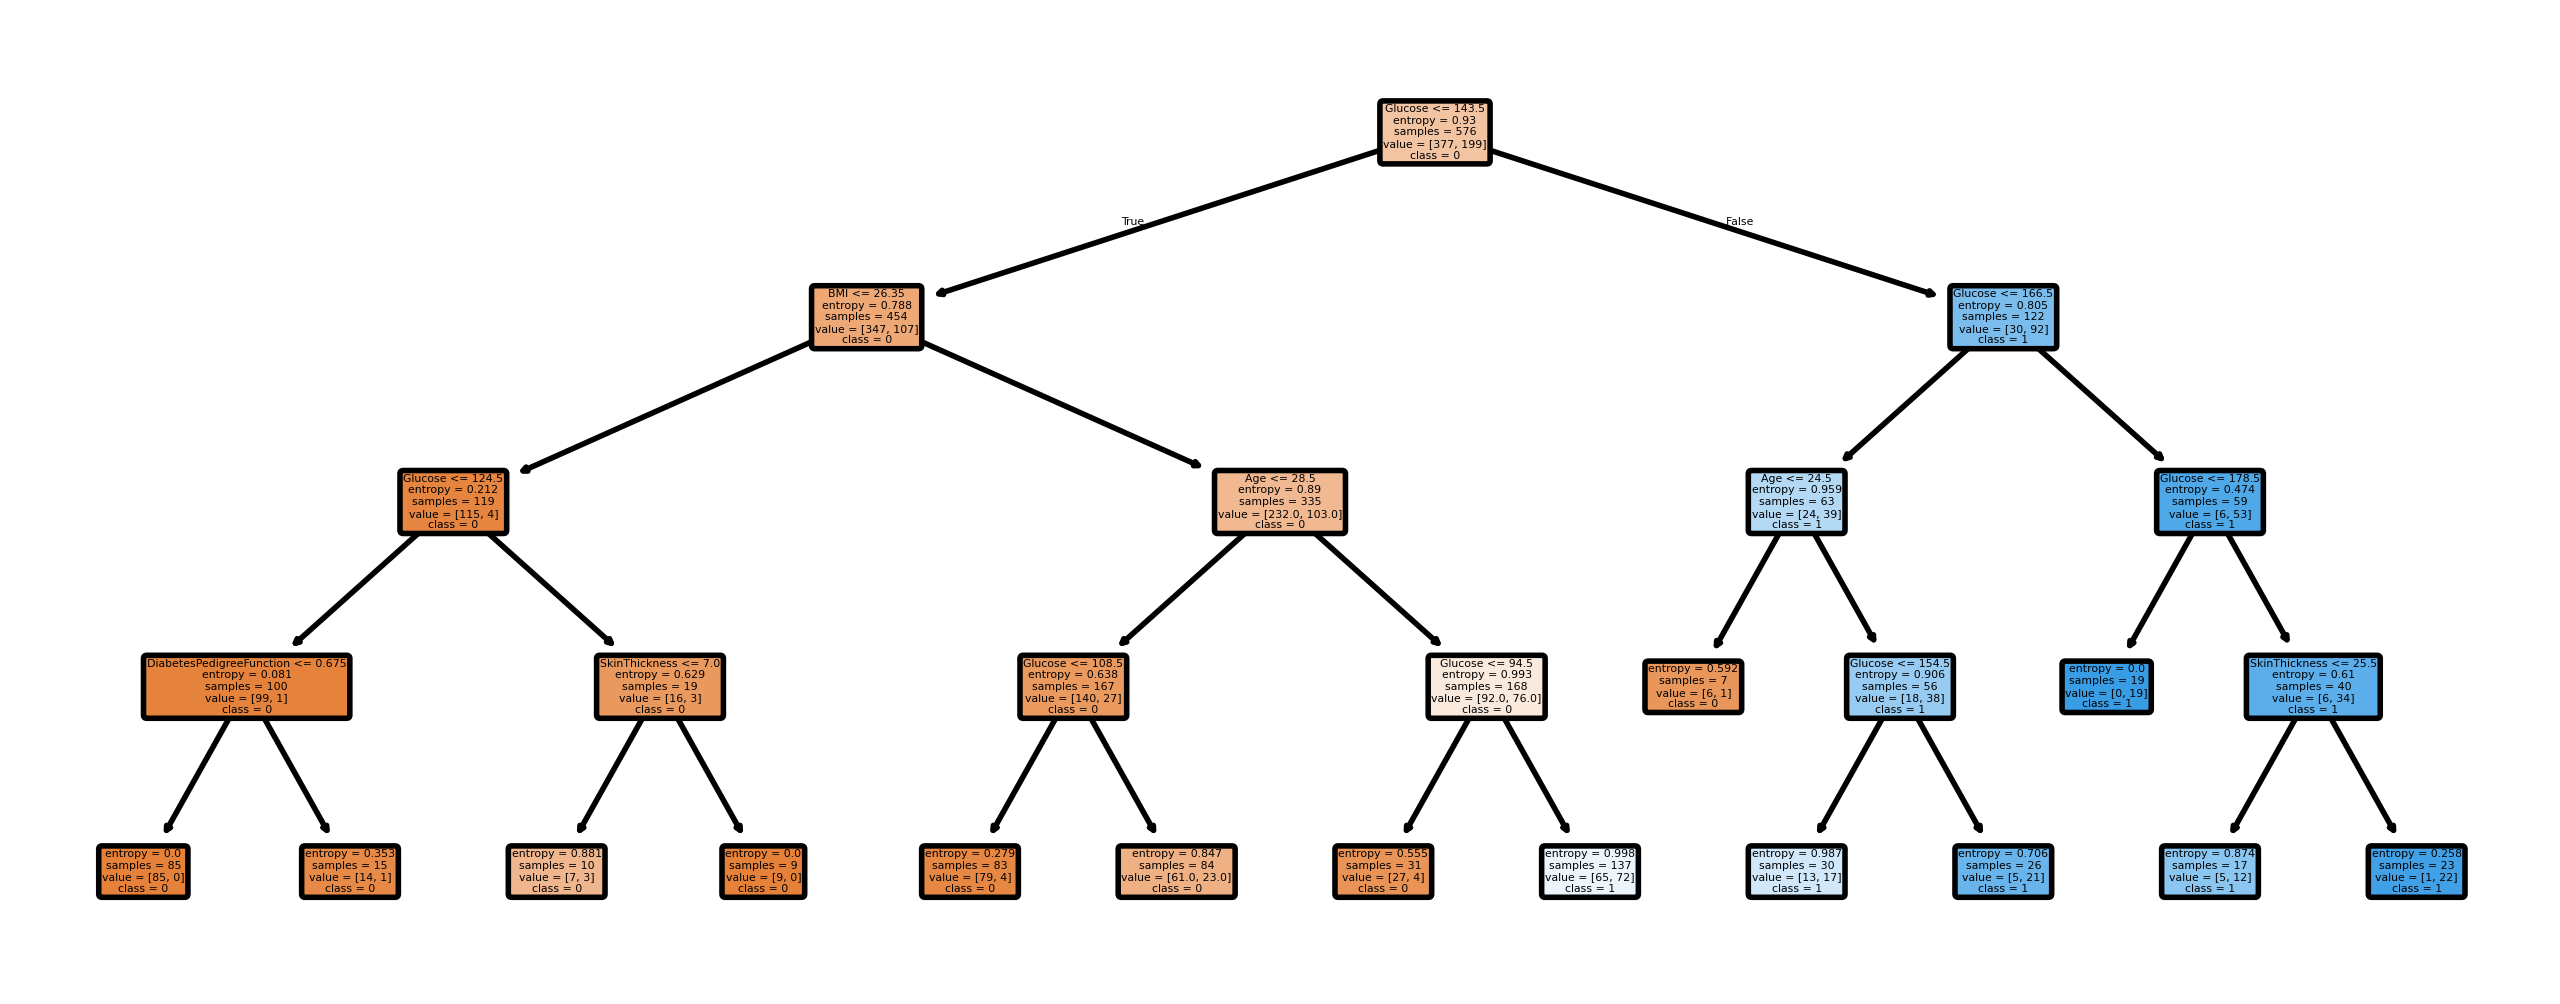

In [49]:
from sklearn import tree
def visualize_tree(model, feature_columns):
    plt.figure(figsize=(8, 3), dpi=400)
    tree.plot_tree(model,
                feature_names=feature_columns,
                class_names=["0", "1"],
                filled=True,
                rounded=True);
    plt.savefig('./output/diabetes.png')

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
visualize_tree(model, feature_columns=feature_cols)

<Axes: >

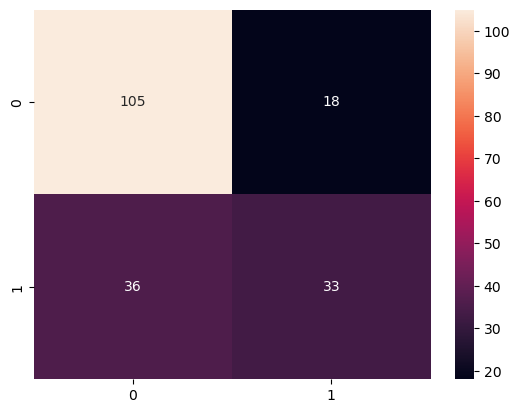

In [43]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")

In [41]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  0.6470588235294118


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall: ",recall)

Recall is:  0.4782608695652174


In [44]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5500


In [43]:
print((2*precision*recall)/(precision+recall))

0.55


## To Do: do some hyperparameter tuning using the decision tree model

Baseline Model Accuracy: 0.7188
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation ROC AUC: 0.8057

Best Model Evaluation Metrics:
Accuracy: 0.6875
Precision: 0.5464
Recall/Sensitivity: 0.7681
F1 Score: 0.6386
ROC AUC: 0.7635

Confusion Matrix:
[[79 44]
 [16 53]]

Improvement over baseline:
F1 Score improvement: 16.10%


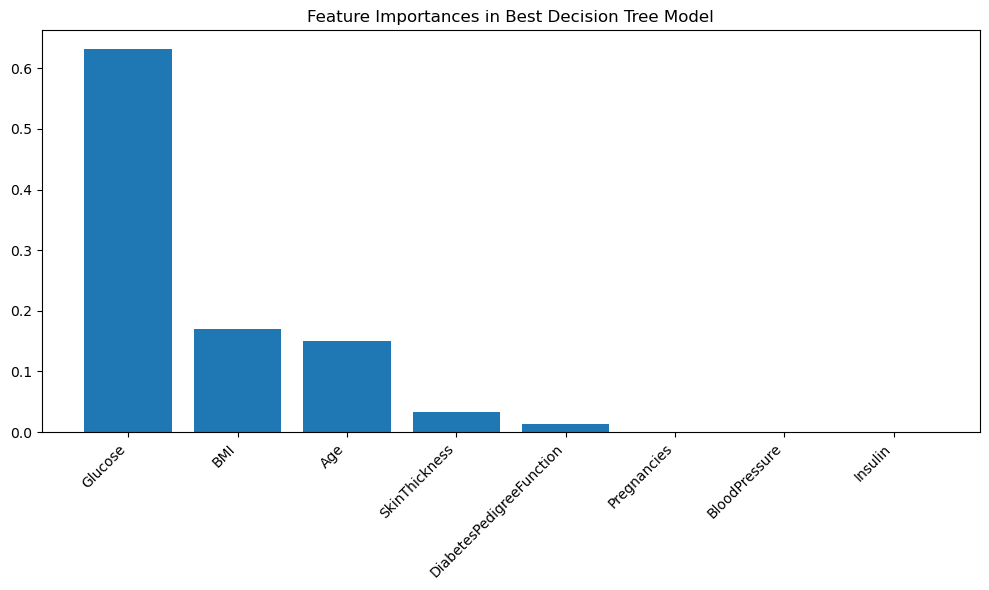


Final model selected and ready for use!


In [46]:
#from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
#from sklearn.tree import DecisionTreeClassifier
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# First, evaluate the baseline model
model_baseline = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)
baseline_accuracy = metrics.accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")

# Define hyperparameter search space
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create GridSearchCV object with stratified k-fold cross-validation
# Using ROC AUC as scoring metric since it's better for imbalanced classification
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation ROC AUC: {grid_search.best_score_:.4f}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate multiple metrics for evaluation
metrics_dict = {
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Precision': precision_score(y_test, y_pred_best),
    'Recall/Sensitivity': recall_score(y_test, y_pred_best),
    'F1 Score': f1_score(y_test, y_pred_best),
    'ROC AUC': roc_auc_score(y_test, y_pred_proba)
}

# Print evaluation metrics
print("\nBest Model Evaluation Metrics:")
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm)

# Compare with baseline model
print("\nImprovement over baseline:")
baseline_f1 = f1_score(y_test, y_pred_baseline)
best_f1 = metrics_dict['F1 Score']
improvement = ((best_f1 - baseline_f1) / baseline_f1) * 100
print(f"F1 Score improvement: {improvement:.2f}%")

# Plot feature importances
feature_importances = pd.DataFrame(
    best_model.feature_importances_,
    index=X_train.columns,
    columns=['Importance']
).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Best Decision Tree Model")
plt.bar(feature_importances.index, feature_importances.Importance)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Use the best model for future predictions
model = best_model
print("\nFinal model selected and ready for use!")

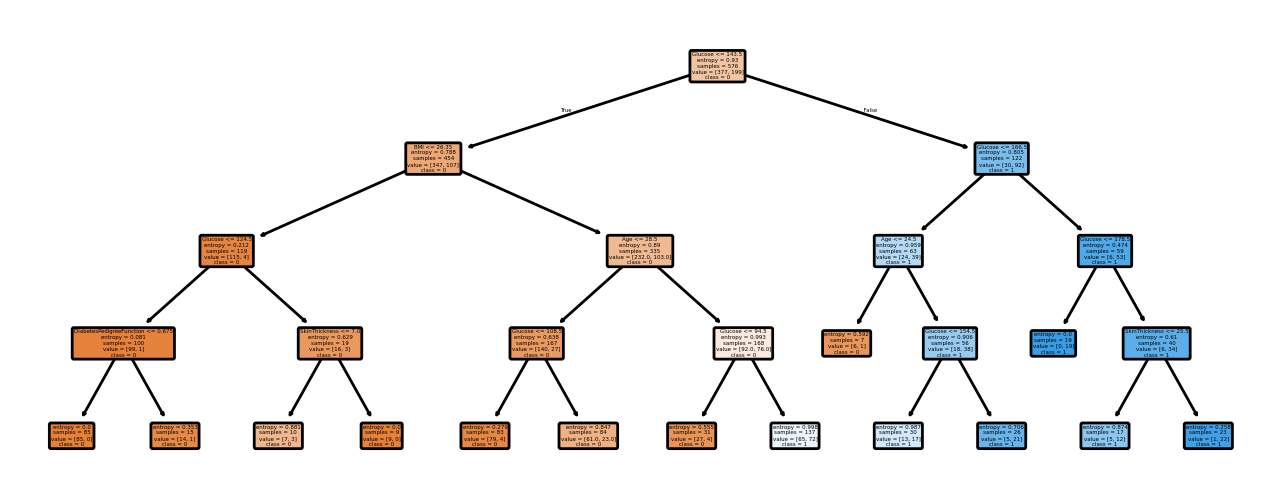

In [48]:
visualize_tree(model, feature_columns=feature_cols)

## Now: use the information of the decision tree classifier to produce simple plots and information for stakeholders. What are some patterns relevant for diabetes that are in the data?

In [47]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [48]:
def barplot(var_select, sub) :
    tmp1 = data[(data['Outcome'] != 0)]
    tmp2 = data[(data['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [49]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [50]:
plot_feat1_feat2('Glucose','Age')

In [51]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [52]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [53]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

In [54]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

barplot('N2', ': BMI <= 30')

In [55]:
plot_feat1_feat2('Pregnancies','Age')

In [56]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

In [57]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')